<h1><center>Normal Distribution</center></h1>

## Table of content
1. Normal Distribution definition
2. Probability Density Function
3. Cumulative Distribution Function
4. Conclusion
5. Resources

## Normal Distribution

What is normal distribution? It’s a probability distribution that occurs in many real world cases. As a data analyst, you must get a good understanding of different probability distributions in statistics in order to understand the data in a better manner. Normal distribution is also called as Gaussian distribution or Laplace-Gauss distribution.

Normal distribution is the default probability for many real-world scenarios. It represents a symmetric distribution where most of the observations cluster around the central peak called as mean of the distribution. A normal distribution can be thought of as a bell curve or Gaussian Distribution which typically has two parameters: mean and standard deviation (SD).

**Mean** – The mean is the usual average. The sum of total points divided by the total number of points.

**Standard Deviation** – Standard deviation tells us how “spread out” the data is. It is a measure of how far each observed value is from the mean.


The parameter used to measure the variability of observations around the mean is called standard deviation. The probabilities for values occurring near the mean are higher than the values far away from the mean. The parameters of the normal distribution plot defining the shape and the probabilities are mean and standard deviation. The area of the plot between two different points in the normal distribution plot represents the probability of the value occurring between those two points.

Many machine learning algorithms assume normal distribution in the data. If you have normally distributed inputs, use a normal probability function to calculate the probability of their occurrence. If your inputs are not normally distributed, transform them by applying log or square root transformations until they become normally distributed before feeding them into an algorithm that assumes normal distribution (such as linear regression).

Here are some of the properties of the normal distribution of the population:

* The points in the normal distribution are symmetric. The normal distribution can not be used to model skewed distributions.
* The mean, median, and mode of the normal distribution are equal.
* Half of the population is less than the mean and half is greater than the mean.
* The empirical rule of the normal distribution goes like the following: 68% of the observations fall within +/- 1 standard deviation from the mean, 95% of the observations fall within +/- 2 standard deviation from the mean and 99.7% of the observations fall within +/- 3 standard deviations from the mean.

An easily understood application for Calculus lies in statistics, in the forms of the normal or Gaussian distribution. The normal distribution or "bell curve" looks like this when plotted:

<IPython.core.display.Latex object>

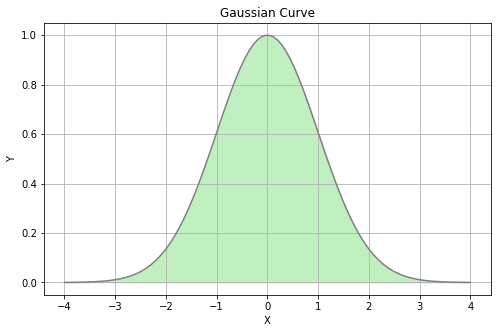

In [3]:
import numpy as np
from sympy import *
from IPython.display import *
init_printing(use_latex=True)
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.gcf()
fig.set_size_inches(8,5)
var('x')
f = lambda x: exp(-x**2/2)
display(Latex('$ \large f(x) = ' + latex(f(x)) + '$'))
x = np.linspace(-4,4,100)
y = np.array([f(v) for v in x],dtype='float')
plt.grid(True)
plt.title('Gaussian Curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x,y,color='gray')
plt.fill_between(x,y,0,color='#c0f0c0')
plt.show()

The plotted function, describes the distribution of certain naturally occurring events. This function is the focus of much attention in statistics and the natural sciences because of its ability to predict statistical distributions based on sparse data.

## Probability Density Function
A more useful form of the above function, one that accepts arguments for "mean" (μ) and "standard deviation" (σ), and named the Probability Density Function (PDF).

The normal distribution density function simply accepts a data point along with a mean value and a standard deviation and throws a value which we call probability density.

We can alter the shape of the bell curve by changing the mean and standard deviation.

Changing the mean will shift the curve towards that mean value, this means we can change the position of the curve by altering the mean value while the shape of the curve remains intact.
The shape of the curve can be controlled by the value of Standard deviation. A smaller standard deviation will result in a closely bounded curve while a high value will result in a more spread out curve.
To find the probability of a value occurring within a range in a normal distribution, we just need to find the area under the curve in that range. i.e. we need to integrate the density function.
Since the normal distribution is a continuous distribution, the area under the curve represents the probabilities.

Because it accepts argument values common in statistics, the PDF is more suited to statistical work than the normalized form shown earlier, and can be used to characterize naturally occurring distributions like IQ (although this application is understandably a matter of much debate): 
Here is the probability density function for normal distribution:

<IPython.core.display.Latex object>

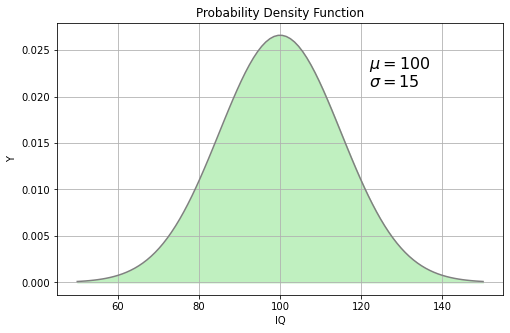

In [2]:
import numpy as np
from sympy import *
from IPython.display import *
init_printing(use_latex=True)
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.gcf()
fig.set_size_inches(8,5)
var('a b x sigma mu')
pdf = Lambda((x,mu,sigma),
  (1/(sigma * sqrt(2*pi)) * exp(-(mu-x)**2 / (2*sigma**2)))
)
ltx = '$ pdf(x,\\mu,\\sigma) = \\frac{1}{ \\sigma' + \
 '\\sqrt{2 \\pi}} e^{\\left(-\\frac{{\\left(\\mu - ' + \
 'x\\right)}^{2}}{2 \\, \\sigma^{2}}\\right)}$'
display(Latex(ltx))
x = np.linspace(50,150,100)
y = np.array([pdf(v,100,15) for v in x],dtype='float')
plt.grid(True)
plt.title('Probability Density Function')
plt.xlabel('IQ')
plt.ylabel('Y')
plt.text(122,0.023,'$\mu = 100$',fontsize=16)
plt.text(122,0.021,'$\sigma = 15$',fontsize=16)
plt.plot(x,y,color='gray')
plt.fill_between(x,y,0,color='#c0f0c0')
plt.show()

In above function, μ represents the mean and σ represents the standard deviation. Given different values of the random variable (x), one could calculate the probability using the above probability density function.

## Cumulative Distribution Function
For many purposes we need to integrate the Probability Density Function to be able to quantify and characterize natural distributions, but, in spite of its great importance to the field of statistics, there is no analytical integral for the PDF — integration of the PDF is carried out numerically. The much-used Cumulative Distribution Function (CDF) is only ever an approximation based on carefully designed numerical methods:

<IPython.core.display.Latex object>

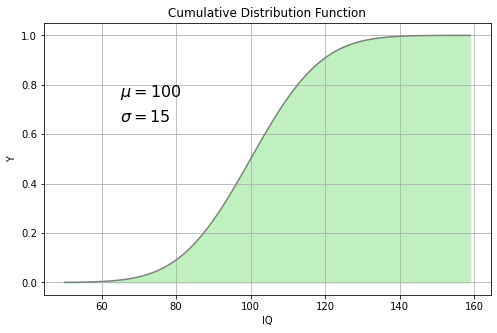

In [6]:
import numpy as np
from sympy import *
from IPython.display import *
init_printing(use_latex=True)
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.gcf()
fig.set_size_inches(8,5)
var('a b x sigma mu')
pdf = Lambda((x,mu,sigma),
  (1/(sigma * sqrt(2*pi)) * exp(-(mu-x)**2 / (2*sigma**2)))
)
cdf = Lambda((a,b,mu,sigma),
  integrate(
    pdf(x,mu,sigma),(x,a,b)
  )
)
display(Latex('$ cdf(a,b,\mu,\sigma) = ' + latex(cdf(a,b,mu,sigma)) + '$'))
x = np.linspace(50,159,100)
y = np.array([cdf(-1e99,v,100,15) for v in x],dtype='float')
plt.grid(True)
plt.title('Cumulative Distribution Function')
plt.xlabel('IQ')
plt.ylabel('Y')
plt.text(65,.75,'$\mu = 100$',fontsize=16)
plt.text(65,.65,'$\sigma = 15$',fontsize=16)
plt.plot(x,y,color='gray')
plt.fill_between(x,y,0,color='#c0f0c0')
plt.show()

* Notice that we define the PDF explicitly,then, rather than writing out the CDF, we rely on the symbolic Python library to produce an integral for us, based on our definition of the pdf.         
*Notice about this definition of the CDF that it accepts two arguments rather than one, and it accepts arguments for mean and standard deviation. I find this form most useful, but some authors define the CDF in a simpler, less useful way.

Using these definitions, we can acquire answers to everyday statistical questions that rely on these functions.

## The technique to find whether data is normally distributed or otherwise is to draw a normal probability distribution plot. Here is a sample probability distribution plot representing normal distribution with a mean of 5 and a standard deviation of 10. The plot is created for random variables taking values between -100 and 100. 

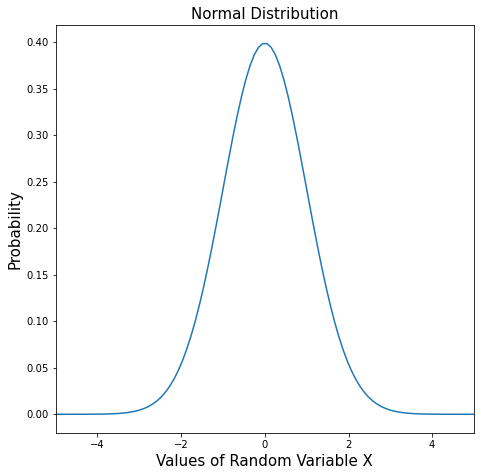

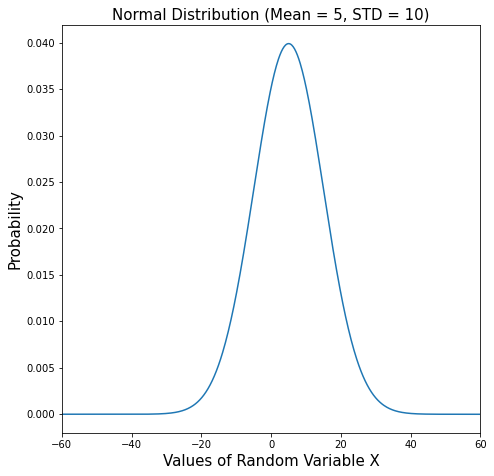

In [10]:
# Create a normal distribution with mean as 5 and standard deviation as 10
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Create a standard normal distribution with mean as 0 and standard deviation as 1

mu = 0
std = 1
snd = stats.norm(mu, std)

# Generate 100 random values between -5, 5

x = np.linspace(-5, 5, 100)

# Plot the standard normal distribution for different values of random variable
# falling in the range -5, 5

plt.figure(figsize=(7.5,7.5))
plt.plot(x, snd.pdf(x))
plt.xlim(-5, 5)
plt.title('Normal Distribution', fontsize='15')
plt.xlabel('Values of Random Variable X', fontsize='15')
plt.ylabel('Probability', fontsize='15')
plt.show()
mu = 5
std = 10
snd = stats.norm(mu, std)
# Generate 1000 random values between -100, 100
x = np.linspace(-100, 100, 1000)
# Plot the standard normal distribution for different values of random variable
# falling in the range -100, 100
plt.figure(figsize=(7.5,7.5))
plt.plot(x, snd.pdf(x))
plt.xlim(-60, 60)
plt.title('Normal Distribution (Mean = 5, STD = 10)', fontsize='15')
plt.xlabel('Values of Random Variable X', fontsize='15')
plt.ylabel('Probability', fontsize='15')
plt.show()

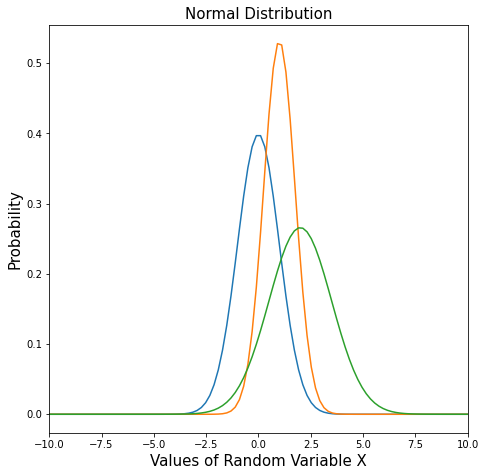

In [12]:
# Multiple Normal Distribution Plots
# The following code can be used to create above shown multiple normal distribution plots having different means and standard deviation.
# Values of random variable

x = np.linspace(-10, 10, 100)

plt.figure(figsize=(7.5,7.5))

# Normal distribution with mean 0 and std as 1

plt.plot(x, stats.norm(0, 1).pdf(x))

# Normal distribution with mean 1 and std as 0.75

plt.plot(x, stats.norm(1, 0.75).pdf(x))

# Normal distribution with mean 2 and std as 1.5

plt.plot(x, stats.norm(2, 1.5).pdf(x))
plt.xlim(-10, 10)
plt.title('Normal Distribution', fontsize='15')
plt.xlabel('Values of Random Variable X', fontsize='15')
plt.ylabel('Probability', fontsize='15')
plt.show()


## Standard Normal Distribution is the normal distribution with mean as 0 and standard deviation as 1. 

Here is the Python code and plot for standard normal distribution. Note that the standard normal distribution has a mean of 0 and standard deviation of 1. Pay attention to some of the following in the code below:

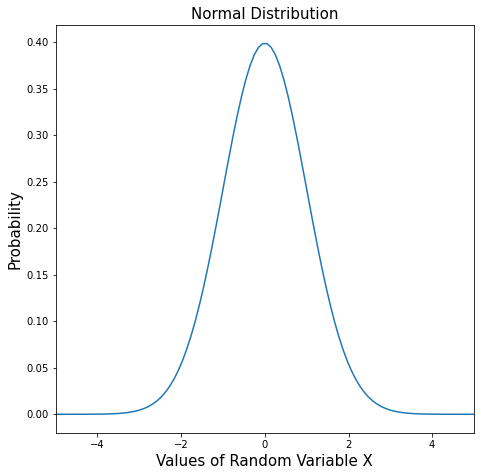

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Create a standard normal distribution with mean as 0 and standard deviation as 1
mu = 0
std = 1
snd = stats.norm(mu, std)
# Generate 100 random values between -5, 5
x = np.linspace(-5, 5, 100)
# Plot the standard normal distribution for different values of random variable
# falling in the range -5, 5
plt.figure(figsize=(7.5,7.5))
plt.plot(x, snd.pdf(x))
plt.xlim(-5, 5)
plt.title('Normal Distribution', fontsize='15')
plt.xlabel('Values of Random Variable X', fontsize='15')
plt.ylabel('Probability', fontsize='15')
plt.show()

Scipy Stats module is used to create an instance of standard normal distribution with mean as 0 and standard deviation as 1 (stats.norm)
Probability density function pdf() is invoked on the instance of stats.norm to generate probability estimates of different values of random variable given the standard normal distribution

Even without using stats.norm.pdf function, we can create multiple normal distribution plots using the following Python code. Note the function normal (x, mu, sigma) and different pairs of mean and standard deviation parameters.

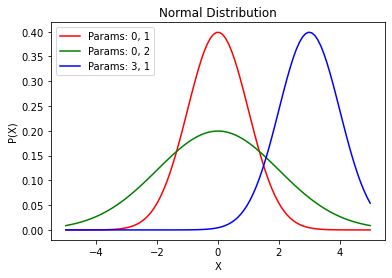

In [16]:
# Normal Distribution Function

import math
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)
 
# Random variable X having different values

X = np.arange(-5, 5, 0.01)
 
# Mean, Standard deviation pairs
params = [(0, 1), (0, 2), (3, 1)]
 
# Plotting different normal distribution curves simultaneously

plt.plot(x, normal(x, params[0][0], params[0][1]), color='r', label='Params: 0, 1')
plt.plot(x, normal(x, params[1][0], params[1][1]), color='g', label='Params: 0, 2')
plt.plot(x, normal(x, params[2][0], params[2][1]), color='b', label='Params: 3, 1')
   
# Naming the x-axis, y-axis and the whole graph

plt.xlabel("X")
plt.ylabel("P(X)")
plt.title("Normal Distribution")
   
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
   
# To load the display window
plt.show()

# Conclusion
Here is the summary of what you learned in relation to Normal distribution:

* Normal distribution is a symmetric probability distribution with equal number of observations on either half of the mean.
* The parameters representing the shape and probabilities of the normal distribution are mean and standard deviation
* Python Scipy stats module can be used to create a normal distribution with meand and standard deviation parameters using method norm.
* Standard normal distribution is normal distribution with mean as 0 and standard deviation as 1.
* In normal distribution, 68% of observations lie within 1 standard deviation, 95% of observations lie within 2 standard deviations and 99.7% observations lie within 3 standard deviations from the mean.

## Resources:
1. https://arachnoid.com/IPython/normal_distribution.html
2. https://docs.sympy.org/dev/modules/stats.html#module-sympy.stats
3. https://vitalflux.com/normal-distribution-explained-python-examples/
4. https://www.askpython.com/python/normal-distribution
5. https://towardsdatascience.com/exploring-normal-distribution-with-jupyter-notebook-3645ec2d83f8
6. https://notebook.community/iRipVanWinkle/ml/Data%20Science%20UA%20-%20September%202017/Lecture%2003%20-%20Basic%20Statistics/Overview_of_distributions